In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pyclustertend import vat,ivat
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
from collections import Counter
import copy

In [2]:
money = pd.read_csv("/Users/jeandre/Desktop/Data Analytics/money.csv")
money.head(5)

,Length,Left,Right,Bottom,Top,Diagonal
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8


### Question 1

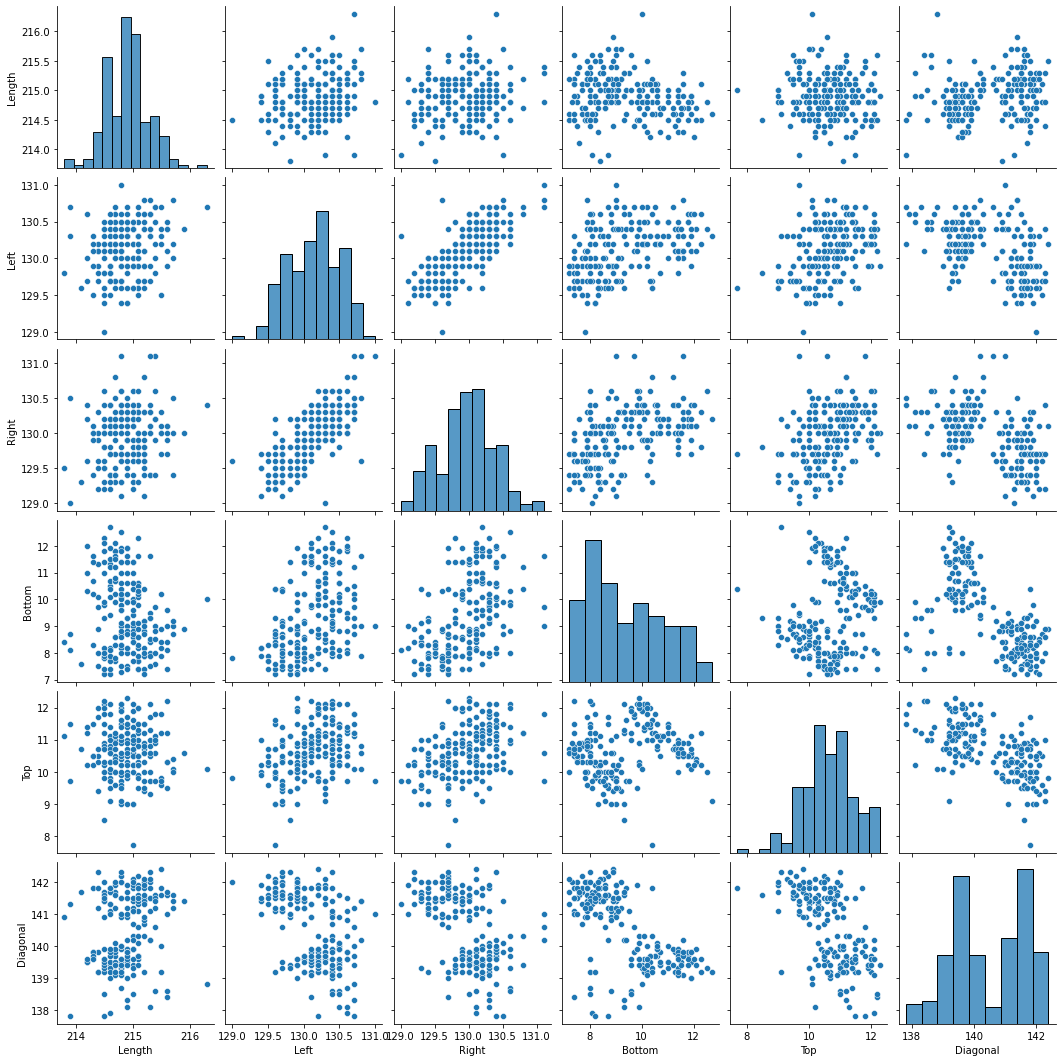

In [3]:
sns.pairplot(money)

### Question 2

Several of the plots featuring diagonal as an axis show clusters: namely Diagonal vs (Top,Bottom,Right,Left,Length).
This is because when looking at the distribution plot for Diagonal we see two clear different clusters, a bimodal distribution.
Top vs Bottom also show two clusters.

### Question 3

In [4]:
distances = pdist(money.values, metric='euclidean')
dist_matrix = squareform(distances)


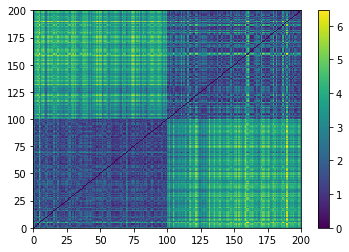

200


In [5]:
N = len(money)
plt.pcolormesh(dist_matrix)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()
print(N)

Using VAT, visual assesment of tendency

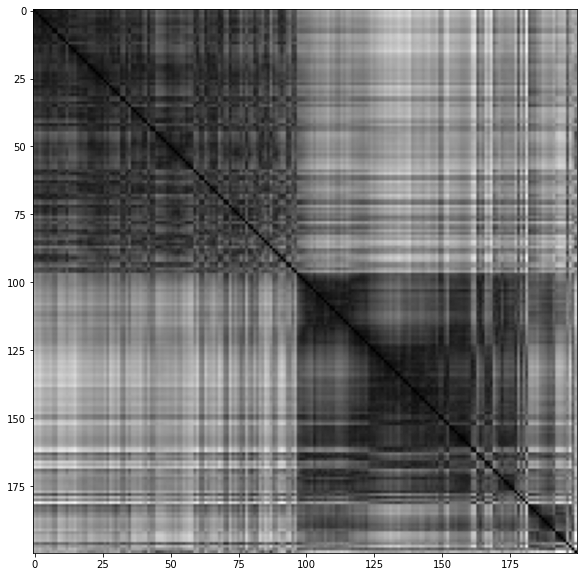

In [6]:
X = (money.values)
vat(X)

The ODI do indeed indicate potential clusters (dark blocks along the diagonal) of at least two, potentially more.

### Question 4

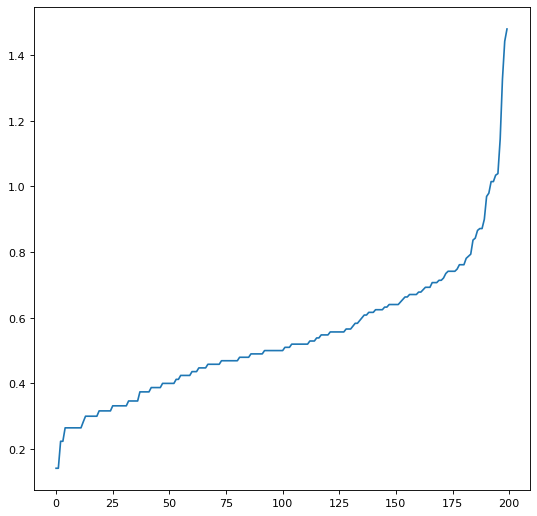

In [7]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(money.values)
distances, indices = neighbors_fit.kneighbors(money.values)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
figure(figsize=(8, 8), dpi=80)
plt.plot(distances)


### Question 5

The elbow here seems to be around the value of 0.8, as a result the search range will be selected as 0.7-0.9 as this covers the full area of the elbow of the curve.

### DBSCAN Question 6

In [8]:
eps_values =  [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
mpts = 4
results = []
for eps_value in eps_values:
    clustering = DBSCAN(eps=eps_value, min_samples=4).fit(money.values)
    results.append(clustering.labels_)
len(results)

8

<AxesSubplot:xlabel='experiment'>

<Figure size 640x640 with 0 Axes>

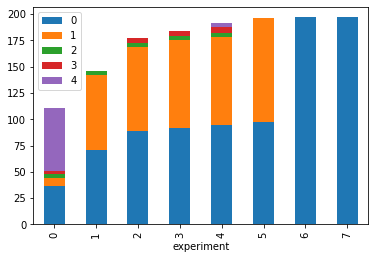

In [9]:
countset = {}
figure(figsize=(8, 8), dpi=80)
for i,result in enumerate(results):
    count = Counter(result)
    countset[i]=count
countset
df = pd.DataFrame.from_dict(countset,orient='index').stack().reset_index()
df.columns = ['experiment','class','count']
df = df.pivot(index='experiment',columns = ['class'])
df.columns = ['noise','0','1','2','3','4']
df.drop('noise',axis=1,inplace=True)
df.plot(kind='bar',stacked=True)


colours here indicating the cluster that the sample was assigned to

### Question 7

In [10]:
moneydf = copy.copy(money)
moneydf["one"] = results[0]
moneydf["two"] = results[1]
moneydf["three"] = results[2]
moneydf["four"] = results[3]
moneydf["five"] = results[4]
moneydf["six"] = results[5]
moneydf["seven"] = results[6]
moneydf["eight"] = results[7]
moneydf.replace(-1,np.nan,inplace=True,regex=True)
moneydf.head()

,Length,Left,Right,Bottom,Top,Diagonal,one,two,three,four,five,six,seven,eight
0,214.8,131.0,131.1,9.0,9.7,141.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,214.6,129.7,129.7,8.1,9.5,141.7,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,214.8,129.7,129.7,8.7,9.6,142.2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,214.8,129.7,129.6,7.5,10.4,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,215.0,129.6,129.7,10.4,7.7,141.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Diagonal', ylabel='Right'>

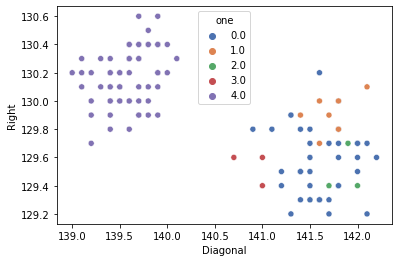

In [11]:
sns.scatterplot(data=moneydf, x="Diagonal", y="Right", hue="one",palette="deep")

<AxesSubplot:xlabel='Diagonal', ylabel='Right'>

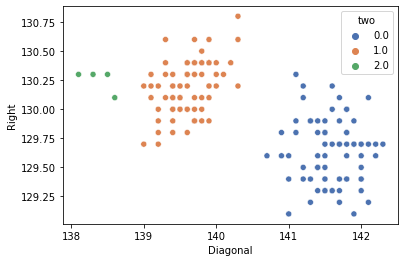

In [12]:
sns.scatterplot(data=moneydf, x="Diagonal", y="Right", hue="two",palette="deep")

<AxesSubplot:xlabel='Diagonal', ylabel='Right'>

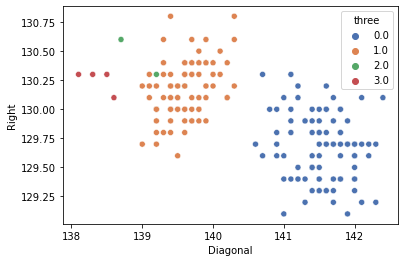

In [13]:
sns.scatterplot(data=moneydf, x="Diagonal", y="Right", hue="three",palette="deep")

<AxesSubplot:xlabel='Diagonal', ylabel='Right'>

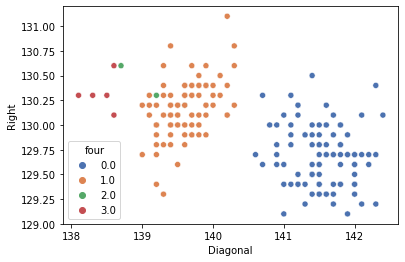

In [14]:
sns.scatterplot(data=moneydf, x="Diagonal", y="Right", hue="four",palette="deep")

<AxesSubplot:xlabel='Diagonal', ylabel='Right'>

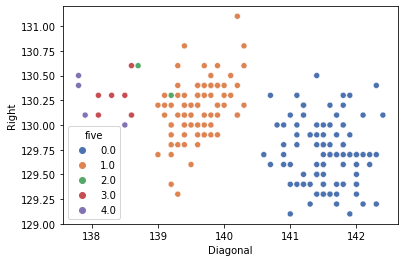

In [15]:
sns.scatterplot(data=moneydf, x="Diagonal", y="Right", hue="five",palette="deep")

<AxesSubplot:xlabel='Diagonal', ylabel='Right'>

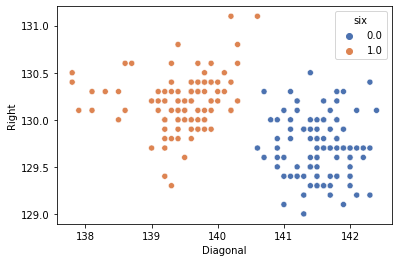

In [16]:
sns.scatterplot(data=moneydf, x="Diagonal", y="Right", hue="six",palette="deep")

<AxesSubplot:xlabel='Diagonal', ylabel='Right'>

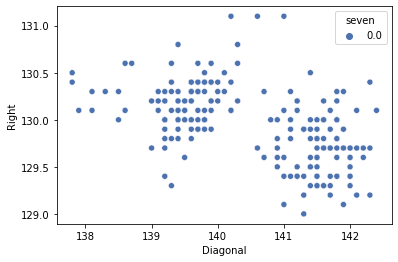

In [17]:
sns.scatterplot(data=moneydf, x="Diagonal", y="Right", hue="seven",palette="deep")

<AxesSubplot:xlabel='Diagonal', ylabel='Right'>

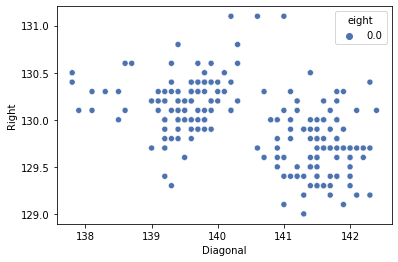

In [18]:
sns.scatterplot(data=moneydf, x="Diagonal", y="Right", hue="eight",palette="deep")

### Question 8

In [19]:
moneyone = copy.copy(money)
moneyone["one"] = results[0]
moneytwo = copy.copy(money)
moneytwo["two"] = results[1]
moneythree = copy.copy(money)
moneythree["three"] = results[2]
moneyfour = copy.copy(money)
moneyfour["four"] = results[3]
moneyfive = copy.copy(money)
moneyfive["five"] = results[4]
moneysix = copy.copy(money)
moneysix["six"] = results[5]
moneyseven = copy.copy(money)
moneyseven["seven"] = results[6]
moneyeight = copy.copy(money)
moneyeight["eight"] = results[7]

print("With noise: \n")
print(davies_bouldin_score(moneyone.iloc[:,:6].values, moneyone['one']))
print(davies_bouldin_score(moneytwo.iloc[:,:6].values, moneytwo['two']))
print(davies_bouldin_score(moneythree.iloc[:,:6].values, moneythree['three']))
print(davies_bouldin_score(moneyfour.iloc[:,:6].values, moneyfour['four']))
print(davies_bouldin_score(moneyfive.iloc[:,:6].values, moneyfive['five']))
print(davies_bouldin_score(moneysix.iloc[:,:6].values, moneysix['six']))
print(davies_bouldin_score(moneyseven.iloc[:,:6].values, moneyseven['seven']))
print(davies_bouldin_score(moneyeight.iloc[:,:6].values, moneyeight['eight']))

moneyone.replace(-1,np.nan,inplace=True,regex=True)
moneytwo.replace(-1,np.nan,inplace=True,regex=True)
moneythree.replace(-1,np.nan,inplace=True,regex=True)
moneyfour.replace(-1,np.nan,inplace=True,regex=True)
moneyfive.replace(-1,np.nan,inplace=True,regex=True)
moneysix.replace(-1,np.nan,inplace=True,regex=True)
moneyseven.replace(-1,np.nan,inplace=True,regex=True)
moneyeight.replace(-1,np.nan,inplace=True,regex=True)

moneyone = moneyone.dropna()
moneytwo = moneytwo.dropna()
moneythree = moneythree.dropna()
moneyfour = moneyfour.dropna()
moneyfive = moneyfive.dropna()
moneysix = moneysix.dropna()
moneyseven = moneyseven.dropna()
moneyeight = moneyeight.dropna()


print("\n Without noise:")
print(davies_bouldin_score(moneyone.iloc[:,:6].values, moneyone['one'].dropna()))
print(davies_bouldin_score(moneytwo.iloc[:,:6].values, moneytwo['two'].dropna()))
print(davies_bouldin_score(moneythree.iloc[:,:6].values, moneythree['three'].dropna()))
print(davies_bouldin_score(moneyfour.iloc[:,:6].values, moneyfour['four'].dropna()))
print(davies_bouldin_score(moneyfive.iloc[:,:6].values, moneyfive['five'].dropna()))
print(davies_bouldin_score(moneysix.iloc[:,:6].values, moneysix['six'].dropna()))
print("\nDavies Bouldin does not work with only one cluster, hence the last two expiremtns cannnot be calculated")


With noise: 

1.394309362432779
1.5165257886617916
1.8291357456295174
1.9343516227142838
1.6637333156260157
1.8878275148273616
3.622890074746307
3.622890074746307

 Without noise:
0.9821627864827509
0.6688614036496444
0.6723126061855014
0.704994974272091
0.7542595574094808
0.7340121802043993

Davies Bouldin does not work with only one cluster, hence the last two expiremtns cannnot be calculated


### Question 9

When noise is included then an Eps of 0.6 should be used. When there is no noise included then an Eps of 0.7 should be used.
I is far better to use the DB score without noise cluster included, since the noise cluster is widley dispersed and can greatly interfere with the result of the score and give misleading results.

### Question 10

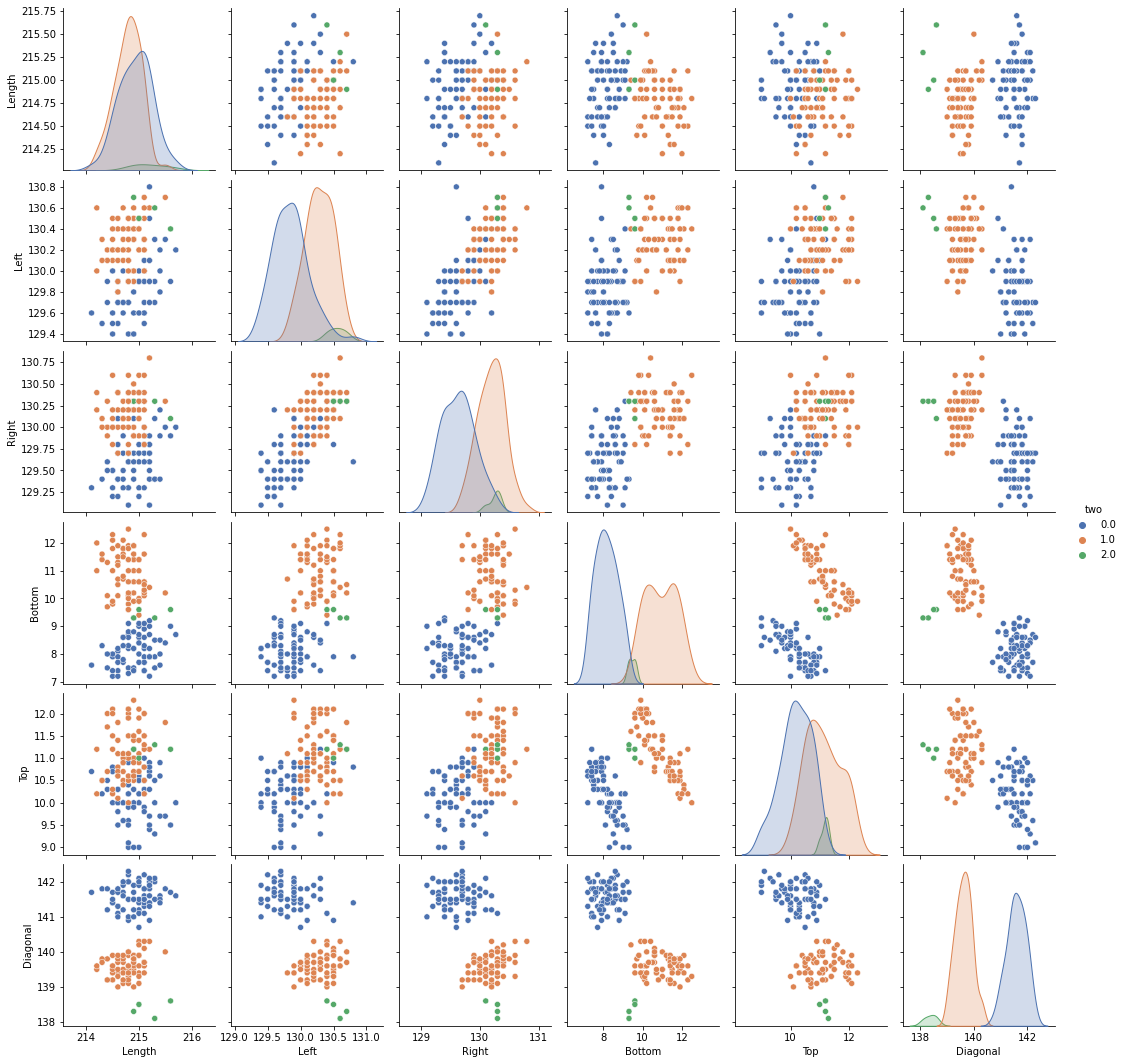

In [20]:
sns.pairplot(moneytwo ,hue="two",palette = "deep")

Eps of 0.7 has been used in the above scatter plot matrix

### Question 11

In [21]:
runs=[1,2,3]
eps=0.7
plotdf = copy.copy(money)

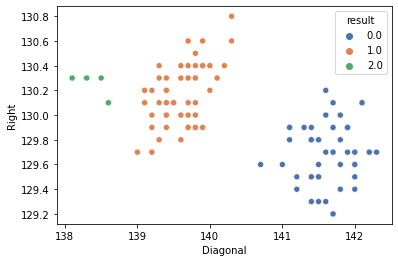

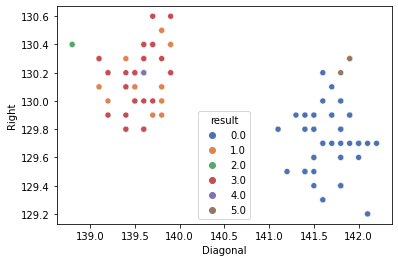

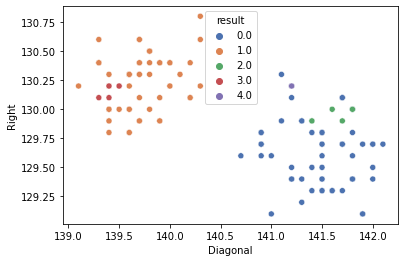

In [22]:

for i,run in enumerate(runs):
    plt.figure(i)
    plot = plotdf.sample(n=200,replace=True,ignore_index=True)
    clustering = DBSCAN(eps=eps, min_samples=4).fit(plot.values)
    plot["result"] = clustering.labels_
    plot.replace(-1,np.nan,inplace=True,regex=True) #Not including noise in the plots below
    plot = plot.dropna()
    sns.scatterplot(data = plot,x="Diagonal",y="Right",hue="result",palette="deep")

    

No the clustering after the sampling with replacement does not produce similar results, sometimes it is possible depending on the random seed used to do the subsampling with replacement.